In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_columns', 40)

In [2]:
transactions = pd.read_excel(r'KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions')
cust_Demog = pd.read_excel(r'KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic')
cust_Ad = pd.read_excel(r'KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress')

In [3]:
skyrocket_merge = pd.merge(left = transactions, right = cust_Demog, on='customer_id', how='left')
skyrocket_merge_final = pd.merge(left=skyrocket_merge, right = cust_Ad, on = 'customer_id', how='left')

In [4]:
skyrocket_merge_final.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age_at_2017,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,Kristos,Anthony,M,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,62.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,Lauree,O'Donnell,F,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,38.0,4 Shopko Circle,2196.0,NSW,Australia,5.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,Berne,Donegan,M,9.0,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,40.0,586 Miller Parkway,2835.0,NSW,Australia,1.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,Titus,Worsall,M,83.0,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,No,16.0,55.0,1617 Harper Parkway,2096.0,NSW,Australia,10.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,Norma,Batrim,F,29.0,1996-12-15,NaN,Retail,Affluent Customer,N,Yes,2.0,21.0,0601 Stephen Place,2292.0,NSW,Australia,7.0


In [5]:
skyrocket_merge_final['age_at_2017'].describe()

count    19542.000000
mean        39.861068
std         12.608024
min         15.000000
25%         30.000000
50%         40.000000
75%         49.000000
max         86.000000
Name: age_at_2017, dtype: float64

In [6]:
x = (skyrocket_merge_final.isna().sum()/skyrocket_merge_final.shape[0])*100
x = x.sort_values(ascending=False)
x

job_industry_category                  16.160
job_title                              11.985
last_name                               3.225
gender                                  2.290
age_at_2017                             2.290
DOB                                     2.290
tenure                                  2.245
online_order                            1.800
brand                                   0.985
product_line                            0.985
product_class                           0.985
standard_cost                           0.985
product_first_sold_date                 0.985
product_size                            0.985
postcode                                0.160
address                                 0.160
state                                   0.160
country                                 0.160
property_valuation                      0.160
past_3_years_bike_related_purchases     0.015
wealth_segment                          0.015
deceased_indicator                

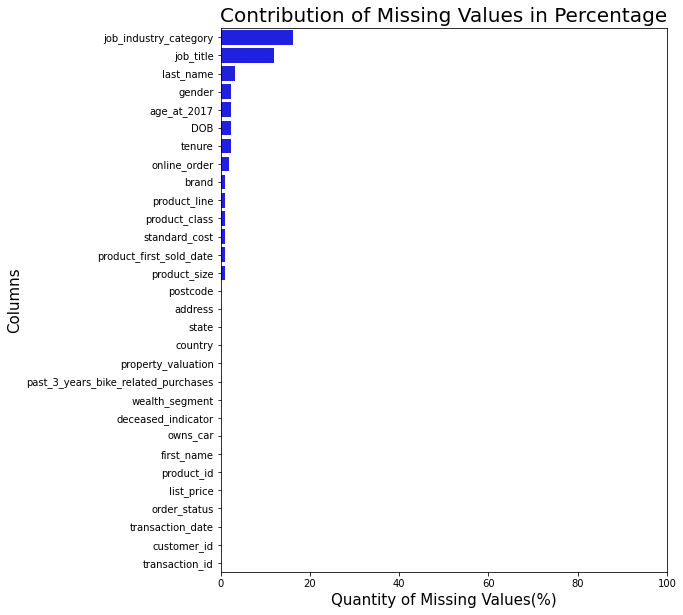

In [7]:
plt.figure(figsize=(8, 10))
plots = sns.barplot(y=x.index, x=x.values, orient='h', color='blue');
plt.title('Contribution of Missing Values in Percentage', fontdict={'fontsize':20})
plt.ylabel('Columns', size=15)
plt.xlabel('Quantity of Missing Values(%)', size=15)
plt.xlim((0,100));
plt.savefig('missing values KPMG', bbox_inches = 'tight');

In [8]:
skyrocket_merge_final.shape

(20000, 30)

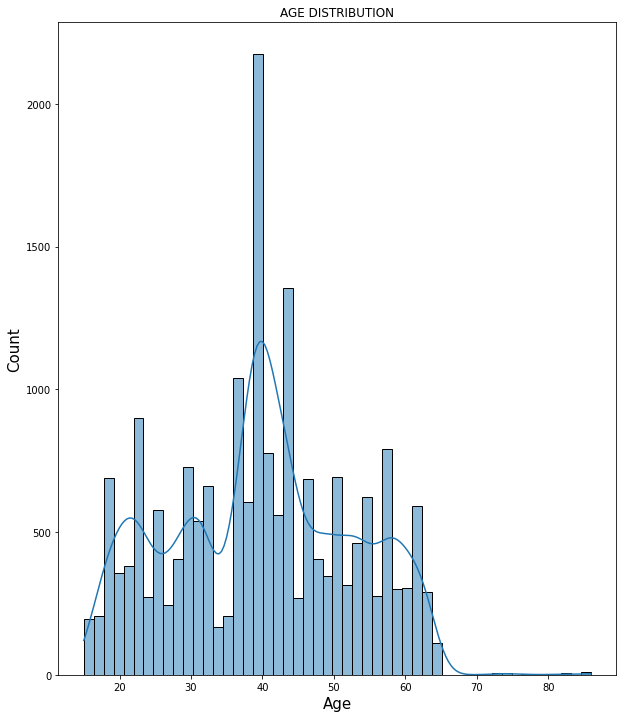

In [9]:
plt.figure(figsize=(10,12))
sns.histplot(data=skyrocket_merge_final, x = 'age_at_2017', kde = True);
plt.title('AGE DISTRIBUTION')
plt.xlabel('Age', size=15)
plt.ylabel("Count", size=15)
plt.savefig('age_distribution', bbox_inches = 'tight')

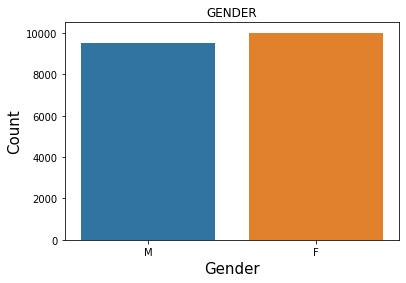

In [66]:
#plt.figure(figsize=(10,12))
sns.countplot(data=skyrocket_merge_final, x = 'gender');
plt.title('GENDER')
plt.xlabel('Gender', size=15)
plt.ylabel("Count", size=15)
plt.savefig('Gender', bbox_inches = 'tight')

In [12]:
(skyrocket_merge_final.gender.value_counts()*100)/len(skyrocket_merge_final)

F    50.055
M    47.655
Name: gender, dtype: float64

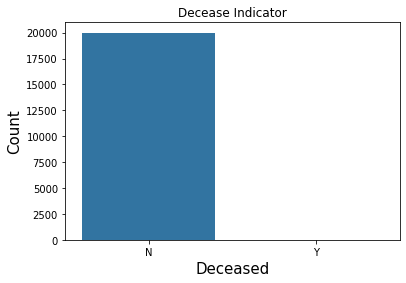

In [67]:
sns.countplot(data=skyrocket_merge_final, x = 'deceased_indicator');
plt.title('Decease Indicator')
plt.xlabel('Deceased', size=15)
plt.ylabel("Count", size=15)
plt.savefig('Deceased', bbox_inches = 'tight')

In [14]:
(skyrocket_merge_final.deceased_indicator.value_counts()*100)/len(skyrocket_merge_final)

N    99.945
Y     0.040
Name: deceased_indicator, dtype: float64

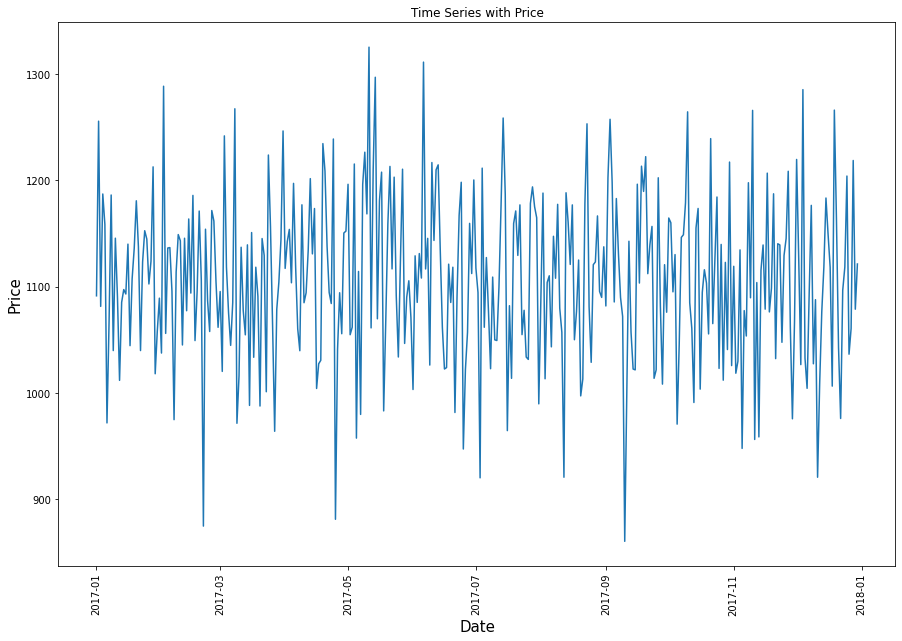

In [18]:
plt.figure(figsize=(15,10))
sns.lineplot(data=skyrocket_merge_final, x='transaction_date' , y='list_price', ci=None)
plt.title('Time Series with Price')
plt.xlabel('Date', size=15)
plt.ylabel("Price", size=15)
plt.xticks(rotation=90)
plt.savefig('Time Series with Price', bbox_inches = 'tight')

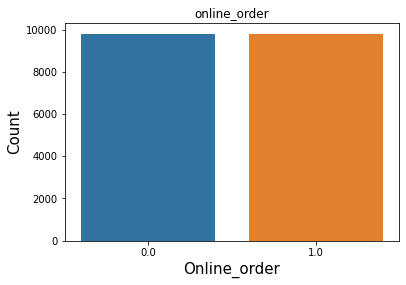

In [68]:
sns.countplot(data=skyrocket_merge_final, x = 'online_order');
plt.title('online_order')
plt.xlabel('Online_order', size=15)
plt.ylabel("Count", size=15)
plt.savefig('online_order', bbox_inches = 'tight')

In [20]:
(skyrocket_merge_final.online_order.value_counts()*100)/len(skyrocket_merge_final)

1.0    49.145
0.0    49.055
Name: online_order, dtype: float64

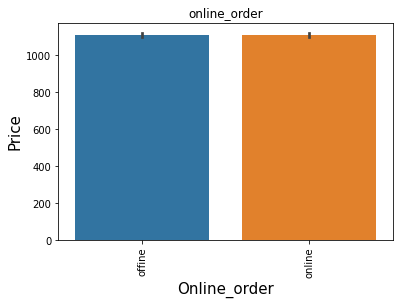

In [70]:
sns.barplot(data=skyrocket_merge_final, x = 'online_order', y='list_price');
plt.title('online_order')
plt.xlabel('Online_order', size=15)
plt.ylabel("Price", size=15)
plt.xticks([0,1], ['offine', 'online'], rotation=90)
plt.savefig('online_order_price', bbox_inches = 'tight')

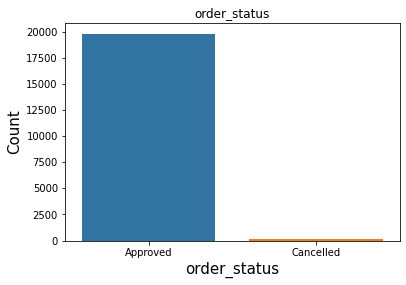

In [71]:
sns.countplot(data=skyrocket_merge_final, x = 'order_status');
plt.title('order_status')
plt.xlabel('order_status', size=15)
plt.ylabel("Count", size=15)
plt.savefig('order_status', bbox_inches = 'tight')

In [26]:
skyrocket_merge_final.list_price.mean()

1107.8294490000271

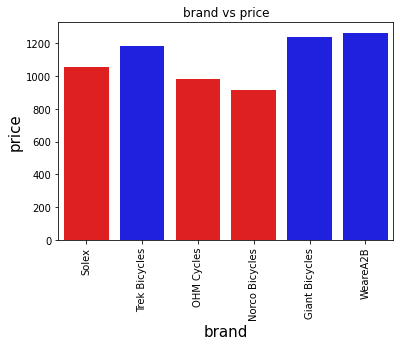

In [72]:
c = {y :'b' if x >= 1108 else 'r' for x,y in zip(skyrocket_merge_final.groupby('brand')['list_price'].mean().values, skyrocket_merge_final.groupby('brand')['list_price'].mean().index)}
sns.barplot(data=skyrocket_merge_final, x = 'brand', y='list_price', palette=c, ci=None)
plt.title('brand vs price')
plt.xlabel('brand', size=15)
plt.ylabel("price", size=15)
plt.xticks(rotation=90);
plt.savefig('brand vs price', bbox_inches = 'tight')

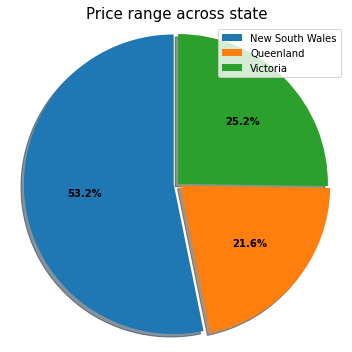

In [73]:
plt.figure(figsize=(5,5))
patches, texts, autotexts = plt.pie(x = skyrocket_merge_final.groupby('state')['list_price'].sum(),  shadow=True, labeldistance=0.3, startangle=90, autopct='%1.1f%%', explode=(0.03, 0.02, 0))
plt.title('Price range across state', size=15)
plt.legend(['New South Wales', 'Queenland', 'Victoria'])
plt.axis('equal')
plt.tight_layout()
for text in texts:
    text.set_color('white')
    text.set_fontsize(10)
    text.set_weight('bold')
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_weight('bold')
    
plt.savefig('Country_price', bbox_inches = 'tight')

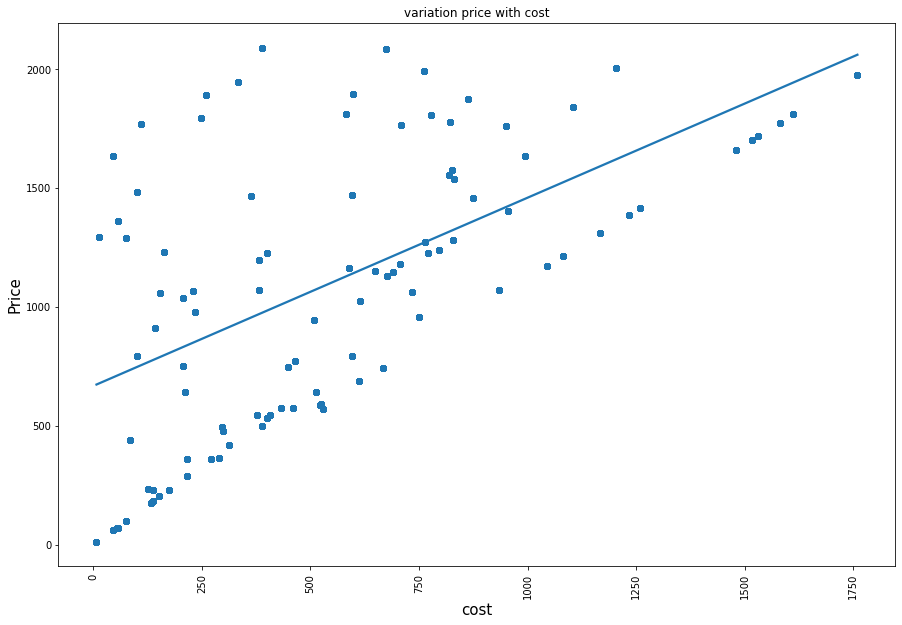

In [74]:
plt.figure(figsize=(15,10))
sns.regplot(data=skyrocket_merge_final, x='standard_cost' , y='list_price', ci=None)
plt.title('variation price with cost')
plt.xlabel('cost', size=15)
plt.ylabel("Price", size=15)
plt.xticks(rotation=90);
plt.savefig('variation price with cost', bbox_inches = 'tight')

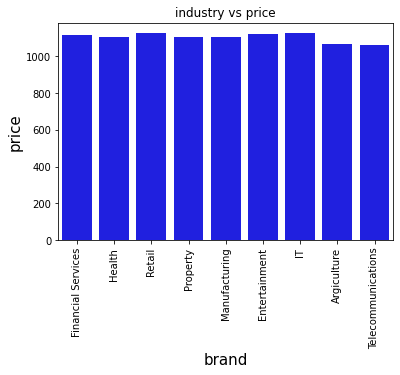

In [75]:
sns.barplot(data=skyrocket_merge_final, x = 'job_industry_category', y='list_price', color='blue', ci=None)
plt.title('industry vs price')
plt.xlabel('brand', size=15)
plt.ylabel("price", size=15)
plt.xticks(rotation=90);
plt.savefig('industry vs price', bbox_inches = 'tight')